### StateSchema with data classes

In [30]:
from typing_extensions import TypedDict
from typing import Literal

class TypedDictState(TypedDict):
    seq:int
    name:str
    game:Literal["cricket","badminton"]

In [40]:
def play_game(state:TypedDictState):
    print("... Play Game Node have been called "+str(state))
    seq = 1 if state["seq"] is None else  state["seq"]
    return {"seq":seq+1,"name":state['name']+" want to play"}


def cricket(state:TypedDictState):
    print("... Cricket Game Node have been called "+str(state))
    return {"seq":state["seq"]+1,"game":"cricket"}

def badminton(state:TypedDictState):
    print("... badminton Game Node have been called "+str(state))
    return {"seq":state["seq"]+1,"name":"badminton"}

            

In [41]:
import random
def decide_play(state:TypedDictState) -> Literal["cricket","badminton"]:
    print("... decide_play Game Node have been called "+str(state))
    if random.random()<0.5:
        return "cricket"
    else:
        return "badminton"

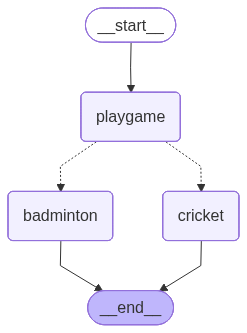

In [42]:
import random
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

builder=StateGraph(TypedDictState)
builder.add_node("playgame",play_game)
builder.add_node("cricket",cricket)
builder.add_node("badminton",badminton)

#flow of the graph
builder.add_edge(START,"playgame")
builder.add_conditional_edges("playgame",decide_play)
builder.add_edge("cricket",END)
builder.add_edge("badminton",END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [43]:
graph.invoke({"name":"Maniram","seq":5})

... Play Game Node have been called {'seq': 5, 'name': 'Maniram'}
... decide_play Game Node have been called {'seq': 6, 'name': 'Maniram want to play'}
... badminton Game Node have been called {'seq': 6, 'name': 'Maniram want to play'}


{'seq': 7, 'name': 'badminton'}

### State passing with Data classes

In [46]:
from dataclasses import dataclass

@dataclass
class DataClassState:
    seq:int
    name:str
    game:Literal["cricket","badminton"]


In [47]:
def play_game(state:DataClassState):
    print("... Play Game Node have been called "+str(state))
    seq = 1 if state.seq is None else  state.seq
    return {"seq":seq+1,"name":state.name+" want to play "}


def cricket(state:DataClassState):
    print("... Cricket Game Node have been called "+str(state))
    return {"seq":state.seq+1,"game":"cricket"}

def badminton(state:DataClassState):
    print("... badminton Game Node have been called "+str(state))
    return {"seq":state.seq+1,"name":"badminton"}

            

In [52]:
import random
def decide_play(state:DataClassState) -> Literal["cricket","badminton"]:
    print("... decide_play Game Node have been called "+str(state))
    if random.random()<0.5:
        return "cricket"
    else:
        return "badminton"

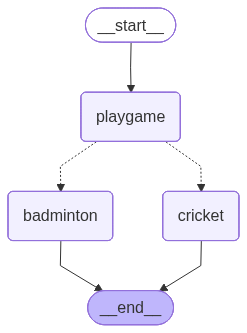

In [53]:
import random
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

builder=StateGraph(TypedDictState)
builder.add_node("playgame",play_game)
builder.add_node("cricket",cricket)
builder.add_node("badminton",badminton)

#flow of the graph
builder.add_edge(START,"playgame")
builder.add_conditional_edges("playgame",decide_play)
builder.add_edge("cricket",END)
builder.add_edge("badminton",END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [57]:
graph.invoke(DataClassState(name="Maniram",seq=19,game="cricket"))

... Play Game Node have been called DataClassState(seq=19, name='Maniram', game='cricket')
... decide_play Game Node have been called DataClassState(seq=20, name='Maniram want to play ', game='cricket')
... Cricket Game Node have been called DataClassState(seq=20, name='Maniram want to play ', game='cricket')


{'seq': 21, 'name': 'Maniram want to play ', 'game': 'cricket'}

In [58]:
graph.invoke(DataClassState(name=100,seq=19,game="cricket"))

... Play Game Node have been called DataClassState(seq=19, name=100, game='cricket')


TypeError: unsupported operand type(s) for +: 'int' and 'str'